In [19]:
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf


from dotenv import load_dotenv
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
load_dotenv()

True

# Preparar las etiquetas

Cargar archivo de anotaciones y comprobar que existe

In [3]:
anot = os.getenv('PMEMO_ANOTATIONS')
stat_anot_file = os.path.join(anot,'static_annotations.csv')

if os.path.exists(stat_anot_file):
    print("El archivo existe")
else:
    print("No hay no existe")
    
anotaciones_df = pd.read_csv(stat_anot_file)
anotaciones_df.head(5)

El archivo existe


,musicId,Arousal(mean),Valence(mean)
0,1,0.4000,0.5750
1,4,0.2625,0.2875
2,5,0.1500,0.2000
3,6,0.5125,0.3500
4,7,0.7000,0.7250


In [4]:
labels = anotaciones_df[['Arousal(mean)','Valence(mean)']].values
print(labels)

[[0.4    0.575 ]
 [0.2625 0.2875]
 [0.15   0.2   ]
 ...
 [0.7125 0.6625]
 [0.875  0.775 ]
 [0.6625 0.575 ]]


# Preparar los espectrogramas

Cargar los espectrogramas ajustados

In [5]:
ASSETS_DIR = os.getenv('ASSETS_DIR')
spect_file = 'padded_spectrograms.pkl'
spect_dir = os.path.join(ASSETS_DIR,spect_file)

#Comprobar que existe el archivo
if os.path.exists(spect_dir):
    with open (spect_dir,'rb') as f:
        spectrograms = pickle.load(f)
    print('Todo bien')
else:
    print('El archivo de espectrogramas no existe')
    spectrograms = None
    

Todo bien


In [6]:
spectrograms = np.array(spectrograms)
print(type(spectrograms))
print(type(spectrograms[0]))
print(spectrograms[0].shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1025, 1671)


# Dividir los datos

In [7]:
#Entrenamiento y pruebas
X_train,X_test,y_train,y_test = train_test_split( spectrograms,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=83)
#Entrenamiento y validación
X_train,X_val, y_train,y_val =  train_test_split( X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=83)

# Normalizar?

In [8]:
# Asumiendo que `spectrograms_array` es tu array de espectrogramas
print("Valor mínimo:", np.min(spectrograms))
print("Valor máximo:", np.max(spectrograms))
print("Media:", np.mean(spectrograms))
print("Desviación estándar:", np.std(spectrograms))

Valor mínimo: -80.0
Valor máximo: 3.8146973e-06
Media: -45.260674
Desviación estándar: 22.533312


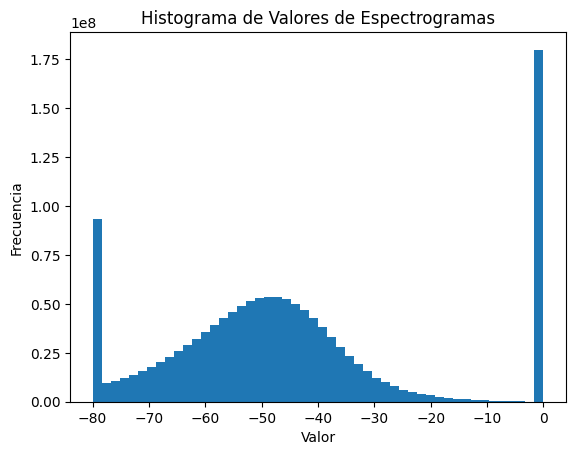

In [9]:
# Aplana el array para facilitar la visualización
values = spectrograms.flatten()

plt.hist(values, bins=50)
plt.title('Histograma de Valores de Espectrogramas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
# Obtener un resumen estadístico
stats = {
    'Mínimo': np.min(values),
    'Máximo': np.max(values),
    'Media': np.mean(values),
    'Desviación Estándar': np.std(values),
    '25º Percentil': np.percentile(values, 25),
    '50º Percentil (Mediana)': np.percentile(values, 50),
    '75º Percentil': np.percentile(values, 75)
}

for key, value in stats.items():
    print(f'{key}: {value}')

Mínimo: -80.0
Máximo: 3.814697265625e-06
Media: -45.26067352294922
Desviación Estándar: 22.53331184387207
25º Percentil: -59.588809967041016
50º Percentil (Mediana): -48.456809997558594
75º Percentil: -36.96426773071289


In [11]:
# Normalizar los datos
X_train_norm = X_train / np.max(X_train)
X_val_norm = X_val / np.max(X_val)
X_test_norm = X_test / np.max(X_test)

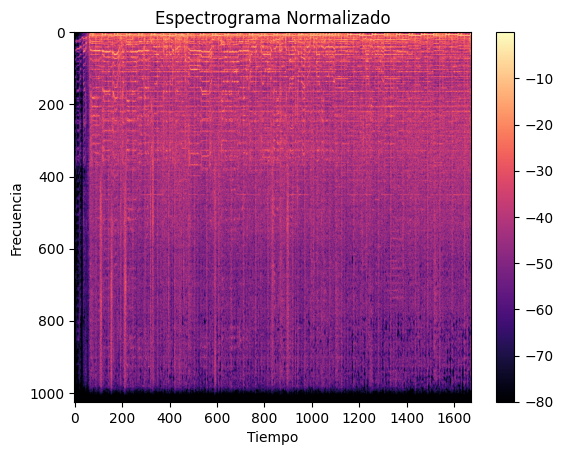

In [12]:
# Selecciona un espectrograma de tu conjunto de datos normalizado
# Aquí se usa el primer espectrograma del conjunto de entrenamiento, pero puedes seleccionar cualquier índice
espectrograma_normalizado = X_train[1]

# Visualizar el espectrograma normalizado
plt.imshow(espectrograma_normalizado, aspect='auto', cmap='magma')
plt.colorbar()
plt.title('Espectrograma Normalizado')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()

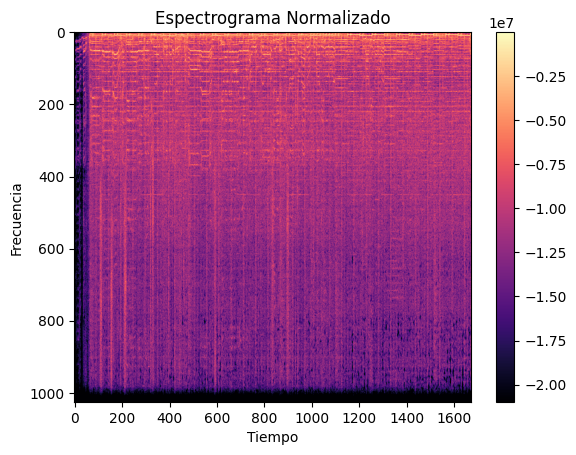

In [13]:
# Selecciona un espectrograma de tu conjunto de datos normalizado
# Aquí se usa el primer espectrograma del conjunto de entrenamiento, pero puedes seleccionar cualquier índice
espectrograma_normalizado = X_train_norm[1]

# Visualizar el espectrograma normalizado
plt.imshow(espectrograma_normalizado, aspect='auto', cmap='magma')
plt.colorbar()
plt.title('Espectrograma Normalizado')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
# Normalizar los datos
X_train = X_train_norm
X_val = X_val_norm
X_test = X_test_norm

# Tensorflow

In [ ]:
# Crear datasets de TensorFlow
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=10000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)